In [132]:
import csv
from collections import defaultdict
from typing import TypedDict
import json
import pandas as pd

class MonthDataPoint(TypedDict):
    month: str 
    destination: str
    product_quantity: int
    product: str


destination_month_destination = []

total_by_destination = defaultdict(int)

autres = ('autres', 'lt', "./data/PFISTER_PORTS_NAVIRES_ANNEXE_LIII_page_589 - exportations de marchandises des Indes, nankins, dentelles, mousselines et soies en 1790 selon les ports de destination (en Lt p.csv")

MONTHS = ["Janvier","Février","Mars","Avril","Mai","Juin","Juillet","Août","Septembre","Octobre","Novembre","Décembre"]
#MONTHS_CODE = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

MONTHS_CODE = ["Jan","Fév","Mar","Avr","Mai","Juin","Juil","Août","Sep","Oct","Nov","Déc"]

ORDER_MONTHS = {k: v for k, v in zip(MONTHS, MONTHS_CODE)}

product_file = [
    ('Genièvre', 'pintes', "./data/PFISTER_PORTS_NAVIRES_A_LIII_p_583 - pintes de genièvre exportées de Dkq en 1790 par mois.xlsx - Sheet1.csv"), 
    ('Eau-de-vie', 'pintes', "./data/PFISTER_PORTS_NAVIRES_A_LIII_p_584 - pintes d'eau-de-vie smogglées en 1790 de Dkq.xlsx - Sheet1.csv"),
    ('Tafia', 'pintes', "./data/PFISTER_PORTS_NAVIRES_A_LIII_p_585 - pintes de Tafia smogglées depuis Dunkkerque en 1790.xlsx - Sheet1.csv"),
    ('Thé', 'lt', "./data/PFISTER_PORTS_NAVIRES_ANNEXE_LIII_page_586 - exportations de thé en 1790 selon les ports de destination (en Lt par mois).xlsx - Feuil1.csv"),
    ('Tabac', 'lt', "./data/PFISTER_PORTS_NAVIRES_ANNEXE_LIII_page_587 - exportations de tabac en 1790 selon les ports de destination (en Lt par mois).xlsx - Feuil1.csv"),
]
for (product, unit, file) in product_file:
    with open(file, "r") as data:
        for row in csv.DictReader(data):
            for month in ORDER_MONTHS:
                if month in row and row[month] != '':
                    data_point:MonthDataPoint = MonthDataPoint(
                        month= ORDER_MONTHS[month],
                        #month=month,
                        destination= row['Port de destination'],
                        product_quantity= int(row[month]),
                        product= product + " ({})".format(unit)
                    )
                    destination_month_destination.append(data_point)
                    total_by_month[month] += int(row[month])

product, unit, file = autres
with open(file, "r") as data:
    for row in csv.DictReader(data):
        for month in ORDER_MONTHS:
            if month in row and row[month] != '' and row["Produit"] == "Marchandises des Indes":
                data_point:MonthDataPoint = MonthDataPoint(
                    month= ORDER_MONTHS[month],
                    destination= row['Port de destination'],
                    product_quantity= int(row[month]),
                    product= row["Produit"] + " ({})".format(unit)
                )
                destination_month_destination.append(data_point)


In [133]:
from IPython.display import display
import pandas as pd

def VegaLite(spec):
    bundle = {}
    bundle['application/vnd.vegalite.v4+json'] = spec
    display(bundle, raw=True)


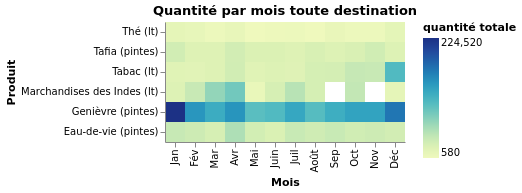

In [134]:
VegaLite({
  "title": "Quantité par mois toute destination",
  "data": {"values": destination_month_destination},
  "transform": [
    {
      "aggregate": [{
       "op": "sum",
       "field": "product_quantity",
       "as": "quantity_all_dest"
      }],
      "groupby": ["product", "month"]
    }
  ],
  "mark": {"type":"rect", "tooltip": {"content": "data"}},
  "encoding": {
    "x": {
      "field": "month",
      "title": "Mois",
      "type": "ordinal",
      
      "sort": MONTHS_CODE,
    },
    "y": {
      "title": "Produit",
      "field":"product",
      "type": "ordinal",
      "sort": { "field":"product", "order": "descending"}
    },
    "color": {
      "field": "quantity_all_dest",
      "title": "quantité totale",
      "type": "quantitative"
    }
  },
  "config": {
    "view": {
      "stroke": "transparent"
    }
  }
})

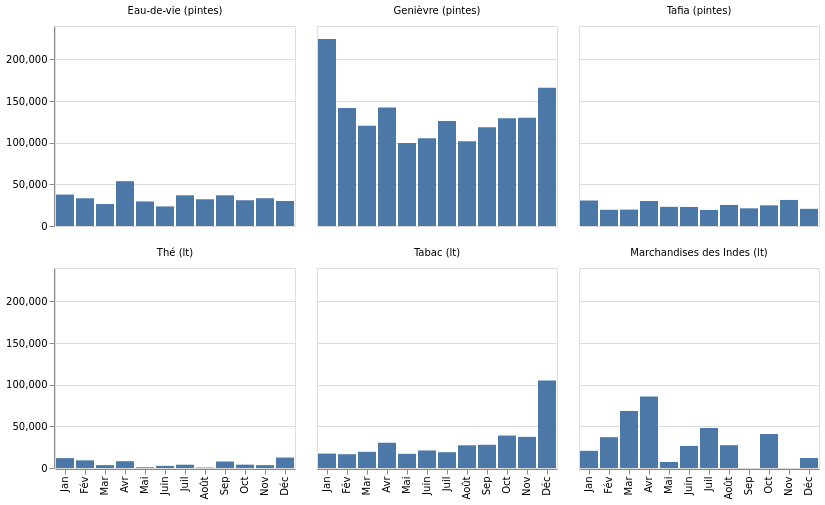

In [135]:
VegaLite({
  "name": "trellis_barley",
  "data": {"values": destination_month_destination},
    "mark": {"type":"bar", "tooltip": {"content": "data"}},
  "encoding": {
    "facet": {
      "title": False,
      "field": "product",
      "columns": 3,
      "sort": ["Eau-de-vie (pintes)", "Genièvre (pintes)", "Tafia (pintes)", "Thé (lt)", "Tabac (lt)", "Marchandise des Indes (lt)"],
    },
    "x": {
      "field": "month",
      "title": False,
      "type": "ordinal",
      
      "sort": MONTHS_CODE,
    },
    "y": {
        "aggregate": "sum", 
        "type": "quantitative", 
        "field": "product_quantity", 
        "title": False,
        "scale": "y"
    }
  }
})